# 6.1. Data Visualisation

Module M-227-04: Programming for Data Analytics

Instructor: prof. Dmitry Pavlyuk

## Data Visualisation

Data visualization involves __making sense of data__ by presenting it in an easily understandable format.

Core principles:
1. Focus on your audience
2. Use standard tools/plots where it is possible
3. Follow general rules: figure and axis labels, layouts, etc.
4. Keep it simple (but informative)
5. Storify your data

All these and other aspects of data visualisation are covered by the specialisation course __"Data Visualisation and Business Intelligence"__.

In this topic we focus just on __technical aspects__ of data visualisation in Python.


### Data Visualisation - matplotlib

__Matplotlib__ (first released in 2003) is the most popular library for data visualisation in Python. 

It's extremely flexible, so you have almost full control on your plots.

In [1]:
!pip install matplotlib

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Note tha "magic" command that starts with %

## Data set - Bikes Sharing Demand

This presentation uses the popular Bikes Sharing Demand data set - please review the data set description in the presentation on Pandas.

In [3]:
import pandas as pd
import numpy as np

### Loading data set

The data set is split into two parts (training and testing data); we just combine them for presentation:

In [4]:
bikes = pd.read_csv("../week5/data/bikes.csv")
bikes2 = pd.read_csv("../week5/data/bikes_test.csv")
bikes = pd.concat([bikes,bikes2])
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 00:00,spring,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,01/01/2011 02:00,spring,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,01/01/2011 03:00,spring,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,01/01/2011 04:00,spring,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


### Defining data types

A proper definition of column types is necessary for correct data visualisation:

In [5]:
bikes["datetime"] = pd.to_datetime(bikes["datetime"], format='%d/%m/%Y %H:%M')
bikes["season"] = bikes["season"].astype('category')
bikes["weather"] = bikes["weather"].astype('category')
bikes["holiday"] = bikes["holiday"].astype('category')
bikes["workingday"] = bikes["workingday"].astype('category')
bikes["humidity"] = bikes["humidity"].astype(float)
bikes.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual               float64
registered           float64
count                float64
dtype: object

## matplotlib from Pandas

__Pandas__ seemless integrates several most frequently used __matplotlib__ plots:
* histograms
* bar plots
* scatters
* boxplots

## Histogram from Pandas

Histograms are used for visualising distribution of __continuous quantitative variables__ (like _temperature_) or __discrete quantitative variables__ with many unique values (like _count_)

* Single histogram

<AxesSubplot:ylabel='Frequency'>

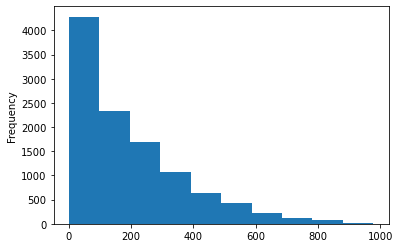

In [6]:
bikes["count"].plot.hist()

### Histogram from Pandas

* Several histograms - separate axis

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>]], dtype=object)

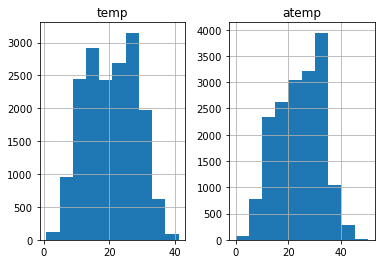

In [7]:
bikes[["temp", "atemp"]].hist()

### Histogram from Pandas

* Several histograms - shared axis

<AxesSubplot:ylabel='Frequency'>

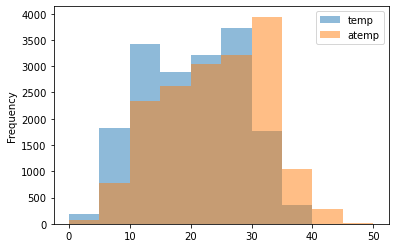

In [8]:
bikes[["temp", "atemp"]].plot.hist(bins=10, alpha=0.5)

## Density plots from Pandas

Density plots provide more detailed information on distribution of quantitative variables by applying __kernels__. Kernels are applied for every unique in the data set and provide weights for smoothing with neighbour values.

Recall images kernels, discussed in "Images as NumPy arrays"

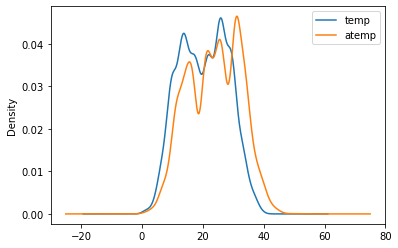

In [9]:
bikes[["temp", "atemp"]].plot.density();

Kernel density plots are much easier to read then several histograms on the same plot

## Box plots from Pandas

Box (box-and-whiskers) plots are used to represent most important desriptive statistics of a variable:

* Median - line in the middle)
* Quartiles (25% and 75%) - the box
* "Normal" deviation (different metrics) - the "whiskers"
* Outliers - circles ouside the whiskers

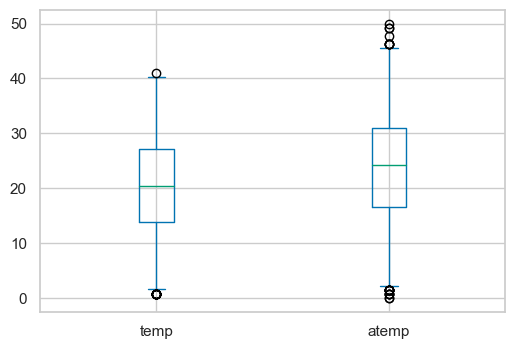

In [51]:
bikes[["temp", "atemp"]].plot.box(whis=1);

## Scatter plots from Pandas

Scatter (XY) plots display all observations of two variables as points on the two-dimensional Cartesian plane and used to represent a relationship between variables:

<AxesSubplot:xlabel='temp', ylabel='count'>

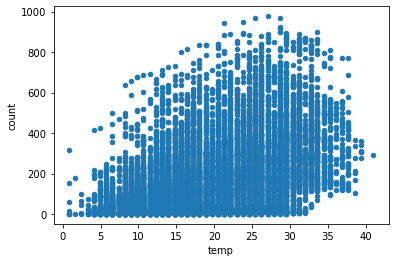

In [11]:
bikes.plot.scatter(x="temp", y="count")

## Bar plots from Pandas

Bar plots represent categorical data with rectangular bars with heights that is proportional to the values which they represent. 

In [12]:
bikes.groupby("season").agg({'count':'median'})

,count
season,
fall,195.0
spring,78.0
summer,172.0
winter,161.0


<AxesSubplot:xlabel='season'>

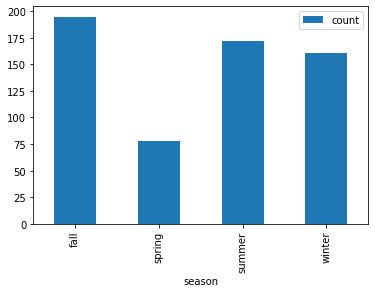

In [13]:
bikes.groupby("season").agg({'count':'median'}).plot.bar()

## Pie charts from Pandas

Pie charts are also used for representing categorical data, but are based on circle slices and usually better for representing relative values.

<AxesSubplot:ylabel='count'>

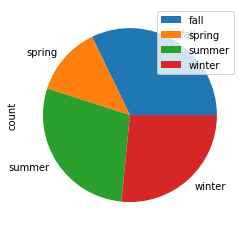

In [14]:
bikes.groupby("season").agg({'count':'median'}).plot.pie(y="count")

## Line plots from Pandas

Line plots represent a series of values, ordered by the numeric scale

<AxesSubplot:xlabel='datetime'>

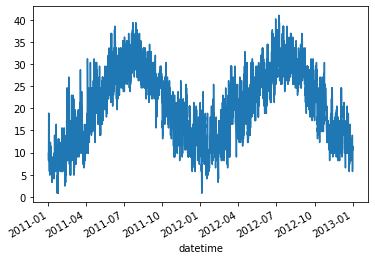

In [15]:
bikes.set_index("datetime")['temp'].plot.line()

## Area plots from Pandas

Area plots are line plots with filled area underneath. Frequently used in a stacked form for representing dinamics of components (e.g., registered and casual bike rentals).

<AxesSubplot:>

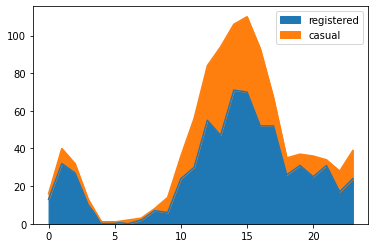

In [16]:
first_day = min(bikes["datetime"].dt.date)
bikes.loc[bikes['datetime'].dt.date==first_day,["registered","casual"]].plot.area()

## matplotlib

Although Pandas plot functions are convenient, constructing figures by matplotlib from scratch gives you the full control over the results.

Frequently used feature that require direct usage of __matplotlib__:
* Advanced layouts
* Full control over presentation

### Anatomy of _matplotlib_ figure

<img width="700" src="https://matplotlib.org/3.5.0/_images/sphx_glr_anatomy_001_2_0x.png"/>

### Matplotlib figure: example

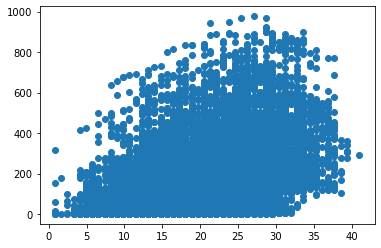

In [17]:
figure, axis = plt.subplots()
axis.scatter(x=bikes['temp'], y=bikes['count'])
plt.show()

### Advanced layout: subplots

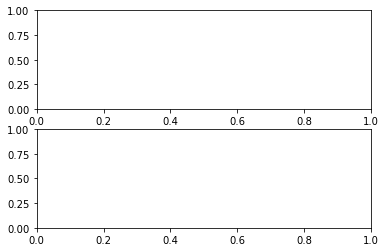

In [18]:
figure, axis = plt.subplots(2, 1)

In [19]:
print(axis)

[<AxesSubplot:> <AxesSubplot:>]


### Advanced layout: plotting on different axis

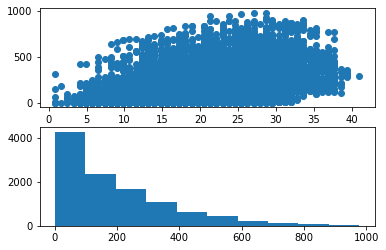

In [20]:
figure, axis = plt.subplots(2, 1)
axis[0].scatter(x=bikes['temp'], y=bikes['count'])
axis[1].hist(bikes['count'])
plt.show()

### Advanced layout: using axis by Pandas

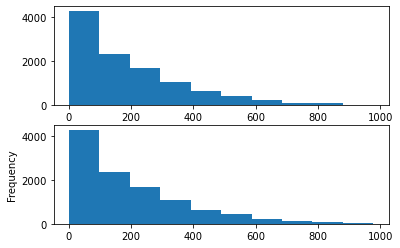

In [21]:
figure, axis = plt.subplots(2, 1)
axis[0].hist(bikes['count'])
bikes['count'].plot.hist(ax=axis[1])
plt.show()

### Advanced layout: grid

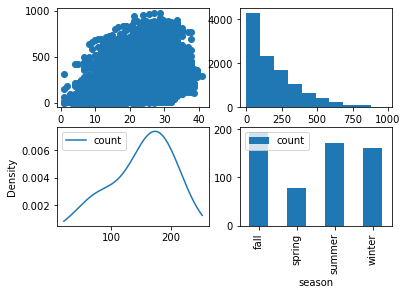

In [22]:
figure, axis = plt.subplots(2, 2)
axis = axis.flatten()
axis[0].scatter(x=bikes['temp'], y=bikes['count'])
axis[1].hist(bikes['count'])
bikes.groupby("season").agg({'count':'median'}).plot.density(ax=axis[2])
bikes.groupby("season").agg({'count':'median'}).plot.bar(ax=axis[3])
plt.show()

### Advanced layout: complex grids

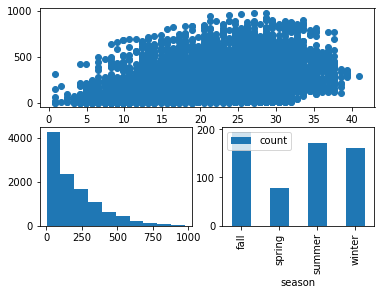

In [23]:
from matplotlib.gridspec import GridSpec
fig = plt.figure()
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax1.scatter(x=bikes['temp'], y=bikes['count'])
ax2.hist(bikes['count'])
bikes.groupby("season").agg({'count':'median'}).plot.bar(ax=ax3)
plt.show()

### Advanced layout: grids

Problem: plot count/temperature scatters for different seasons

In [24]:
bikes['season'].unique()

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['fall', 'spring', 'summer', 'winter']

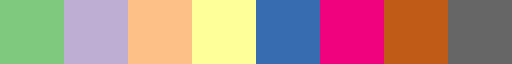

In [25]:
plt.cm.Accent

### Advanced layout: grids

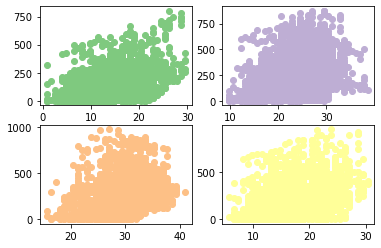

In [26]:
figure, axis = plt.subplots(2, 2)
axis = axis.flatten()
i = 0
for season in bikes['season'].unique():
    axis[i].scatter(x=bikes.loc[bikes['season']==season,'temp'], 
                    y=bikes.loc[bikes['season']==season,'count'], 
                    color=plt.cm.Accent.colors[i])
    i+=1
plt.show()

### Advanced layout: shared axes

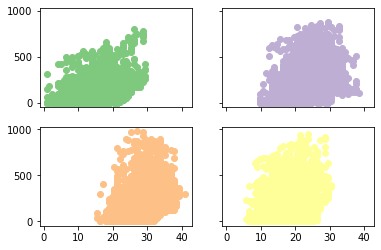

In [27]:
figure, axis = plt.subplots(2, 2, sharex=True, sharey=True)
axis = axis.flatten()
i = 0
for season in bikes['season'].unique():
    axis[i].scatter(x=bikes.loc[bikes['season']==season,'temp'], 
                    y=bikes.loc[bikes['season']==season,'count'], 
                    color=plt.cm.Accent.colors[i])
    i+=1
plt.show()


### Full control: adding titles and labels

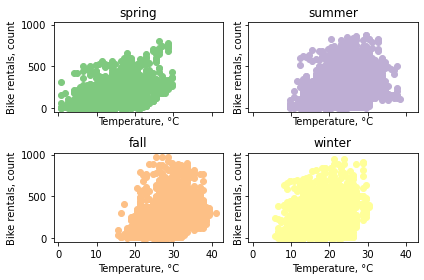

In [28]:
deg = u'\N{DEGREE SIGN}'

figure, axis = plt.subplots(2, 2, sharex=True, sharey=True)
axis = axis.flatten()
i = 0
for season in bikes['season'].unique():
    axis[i].scatter(x=bikes.loc[bikes['season']==season,'temp'], 
                    y=bikes.loc[bikes['season']==season,'count'], 
                    color=plt.cm.Accent.colors[i])
    axis[i].set_title(season)
    axis[i].set_xlabel("Temperature, "+deg+"C")
    axis[i].set_ylabel("Bike rentals, count")
    i+=1
figure.tight_layout()
plt.show()


### Full control: plot attributes

In [29]:
def make_plot():
    figure, axis = plt.subplots(figsize=(12, 5))
    for season in bikes['season'].unique():
        axis.scatter(x=bikes.loc[bikes['season']==season,'temp'], 
                     y=bikes.loc[bikes['season']==season,'count'],
                     label=season, cmap=plt.cm.Accent)
    axis.set_title("Bike rentals vs. Temperature") #Title
    axis.set_xlabel("Temperature, "+deg+"C") # X axis' label
    axis.set_ylabel("Bike rentals, count") # Y axis' label
    axis.set_ylim([0,1200]) # Y axis' limits
    axis.set_xlim([0,45]) # X axis' limits
    startx, endx = axis.get_xlim()
    start, end = axis.get_ylim()
    axis.xaxis.set_ticks(np.arange(startx, endx, 10)) # Sequence of X ticks
    axis.yaxis.set_ticks(np.arange(start, end, 400)) # Sequence of Y ticks

    axis.tick_params(axis='x', 
                     labelrotation=45, 
                     color='red', 
                     labelcolor='blue',
                     grid_color="red",
                     grid_alpha=0.5) # X axis' tick format
    axis.get_yticklabels()[1].set_color('red') # Individual X axis' tick format
    axis.legend(loc='upper left'); # Legend
    plt.grid() # Show grid

### Full control: plot attributes

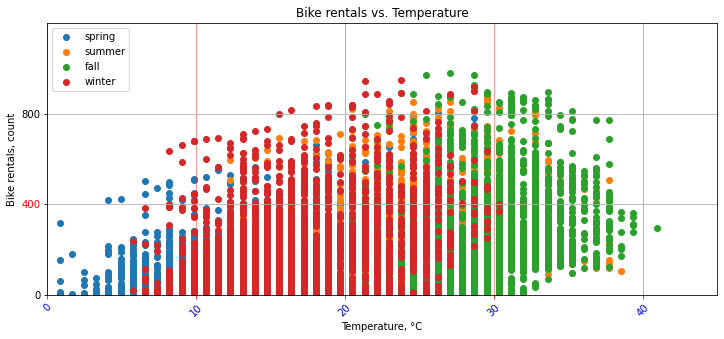

In [30]:
make_plot()
plt.show()

### Full control: Formatter

In [31]:
bikes_weekly = bikes.set_index('datetime').resample('W').\
    agg({'temp':'mean', 'humidity':'mean'}).reset_index()

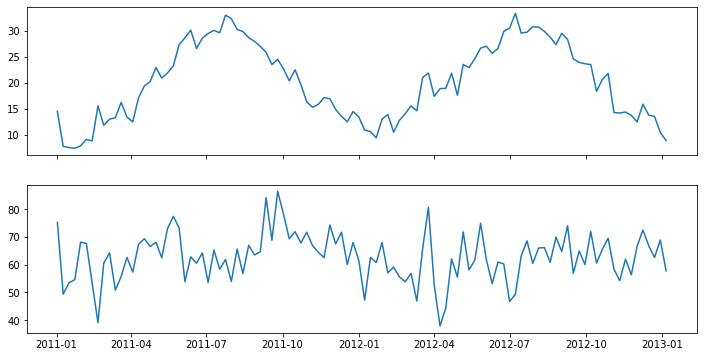

In [32]:
figure, axis = plt.subplots(2, 1, figsize=(12,6), sharex=True)
axis[0].plot(bikes_weekly['datetime'], bikes_weekly['temp'])
axis[1].plot(bikes_weekly['datetime'], bikes_weekly['humidity'])
plt.show()

### Full control: Twin axes + Formatter

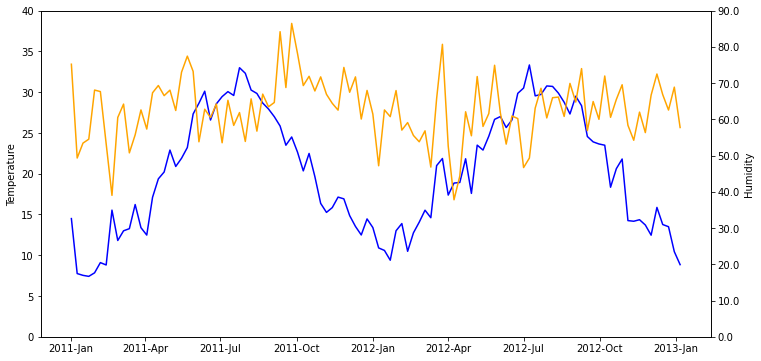

In [33]:
from matplotlib.dates import DateFormatter

figure, axis = plt.subplots(figsize=(12,6))
ax2 = axis.twinx()
axis.plot(bikes_weekly['datetime'], bikes_weekly['temp'], c="blue")
axis.set_ylim([0,40])
axis.set_ylabel("Temperature")
ax2.plot(bikes_weekly['datetime'], bikes_weekly['humidity'], c="orange")
ax2.set_ylim([0,90])
ax2.set_ylabel("Humidity")
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f"{x:.1f}"))
axis.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.show()

### 3D plots

In [34]:
bikes_3D = bikes.groupby([bikes['datetime'].dt.weekday,bikes['datetime'].dt.hour]).agg({'count':'median'})
bikes_3D.index.names = ["weekday","hour"]
bikes_3D = bikes_3D.reset_index().pivot(index=['hour'],columns=['weekday'], values='count').astype(float)
bikes_3D.T

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,30.0,13.0,8.0,4.0,5.0,23.0,94.0,268.0,417.0,219.0,...,185.0,196.0,298.0,528.0,518.0,372.0,240.0,177.0,116.0,63.0
1,26.0,11.0,5.0,3.0,5.0,22.0,108.5,311.5,462.5,219.5,...,159.0,178.0,292.0,569.0,538.0,365.0,268.0,195.0,137.0,73.0
2,33.0,12.0,5.0,4.0,4.0,27.0,112.0,312.0,487.0,225.0,...,163.0,176.0,277.0,517.0,489.0,347.0,256.0,189.0,129.0,70.0
3,34.0,15.0,7.0,4.0,5.0,26.0,112.0,304.0,484.0,227.0,...,180.0,180.0,294.0,563.0,523.0,364.0,258.0,195.0,149.0,97.0
4,54.5,23.0,11.0,6.0,5.0,24.0,87.5,248.0,454.0,244.5,...,215.5,233.5,338.5,510.5,424.0,293.0,215.5,164.5,148.5,119.5
5,95.0,70.5,51.0,23.0,7.0,8.0,20.5,46.5,118.5,207.0,...,389.0,393.5,399.0,347.0,297.0,248.0,181.5,165.0,146.5,124.0
6,99.5,77.5,66.0,28.0,9.5,8.0,15.0,34.5,87.0,169.0,...,355.0,356.5,353.0,326.0,254.5,227.5,175.0,132.0,95.5,54.5


### 3D plots

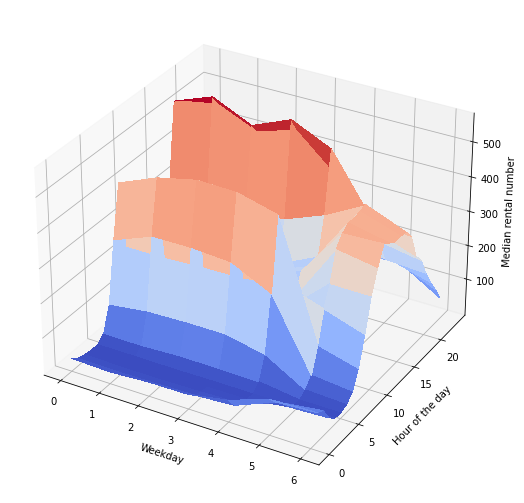

In [35]:
figure, axis = plt.subplots(subplot_kw={"projection": "3d"},figsize=(9,9))
X, Y = np.meshgrid(bikes_3D.columns, bikes_3D.index)
surf = axis.plot_surface(X, Y, bikes_3D, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
axis.set_ylabel("Hour of the day")
axis.set_xlabel("Weekday")
axis.set_zlabel("Median rental number")
plt.show()

### 3D plots: Formatter

In [36]:
import calendar
list(calendar.day_abbr)

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

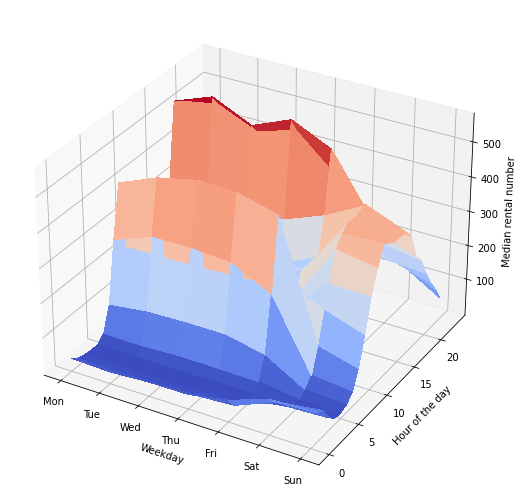

In [37]:
def format_days(x, pos):
    if (int(x) in range(len(calendar.day_abbr))):
        return(calendar.day_abbr[int(x)])
    
figure, axis = plt.subplots(subplot_kw={"projection": "3d"},figsize=(9,9))
X, Y = np.meshgrid(bikes_3D.columns, bikes_3D.index)
surf = axis.plot_surface(X, Y, bikes_3D, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
axis.set_ylabel("Hour of the day")
axis.set_xlabel("Weekday")
axis.xaxis.set_major_formatter(plt.FuncFormatter(format_days))
axis.set_zlabel("Median rental number")
plt.show()

### 3D plots: contours and heatmaps

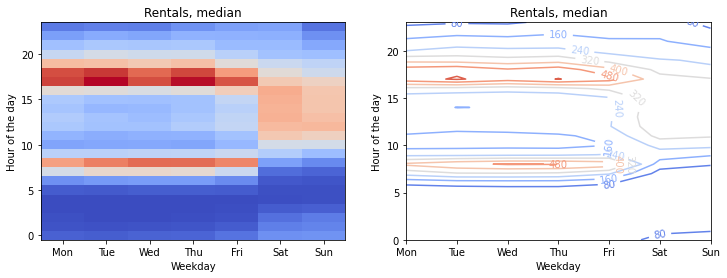

In [38]:
figure, axis = plt.subplots(1,2, figsize=(12,4))
X, Y = np.meshgrid(bikes_3D.columns, bikes_3D.index)
axis[0].grid(False)
axis[0].pcolormesh(X, Y, bikes_3D, cmap=plt.cm.coolwarm)
axis[0].set_title("Rentals, median")
axis[0].set_ylabel("Hour of the day")
axis[0].set_xlabel("Weekday")
axis[0].xaxis.set_major_formatter(plt.FuncFormatter(format_days))
cs = axis[1].contour(X, Y, bikes_3D, cmap=plt.cm.coolwarm)
plt.clabel(cs, inline=1)
axis[1].set_title("Rentals, median")
axis[1].set_ylabel("Hour of the day")
axis[1].set_xlabel("Weekday")
axis[1].xaxis.set_major_formatter(plt.FuncFormatter(format_days))
plt.show()

## Seaborn

Seaborn is a data visualization library __based on matplotlib__ that provides a high-level interface for drawing attractive and informative statistical graphics.

Key advantages:
1. Attractive and easily manageable themes
2. Usable statistical plots

In [39]:
import seaborn as sns

## Themes: Accent palette

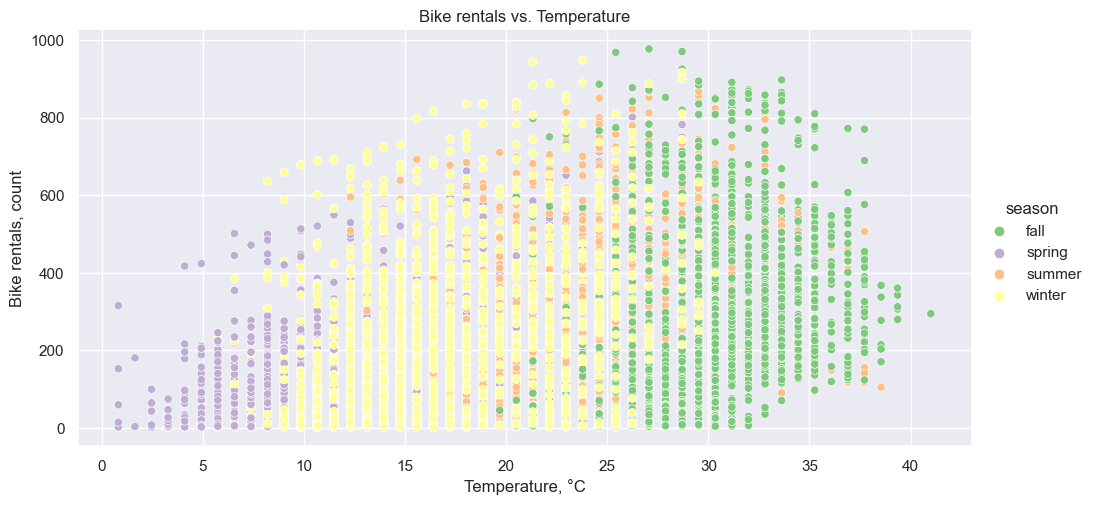

In [40]:
sns.set(rc={'figure.dpi':100, 'figure.figsize':(6,4)})
sns.set(style="darkgrid", palette="Accent")
ax = sns.relplot(data = bikes, x='temp', y='count', kind="scatter", hue="season", aspect=2)
ax.set(xlabel = "Temperature, "+deg+"C", ylabel = 'Bike rentals, count', title="Bike rentals vs. Temperature");

## Themes: Colorblind palette

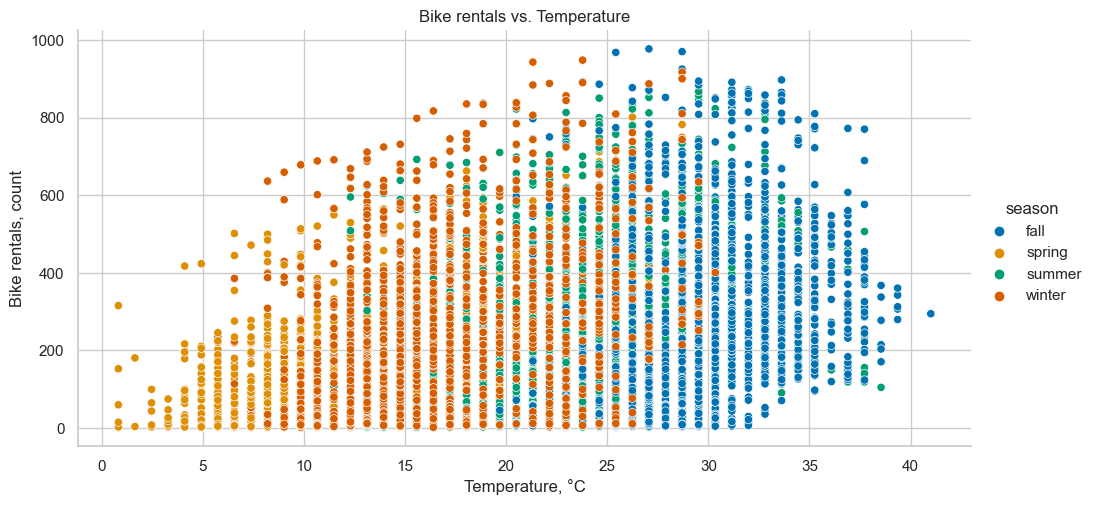

In [41]:
sns.set(style="whitegrid", palette="colorblind")
ax = sns.relplot(data = bikes, x='temp', y='count', kind="scatter", hue="season", aspect=2)
ax.set(xlabel = "Temperature, "+deg+"C", ylabel = 'Bike rentals, count', title="Bike rentals vs. Temperature");

## Advanced plots: Histogram + Density

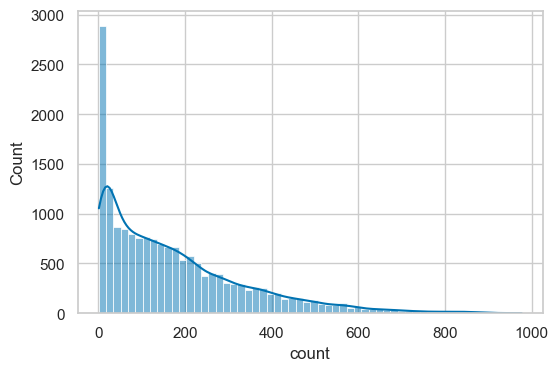

In [42]:
sns.histplot(data=bikes, x='count', kde=True);

## Advanced plots: Facet grid

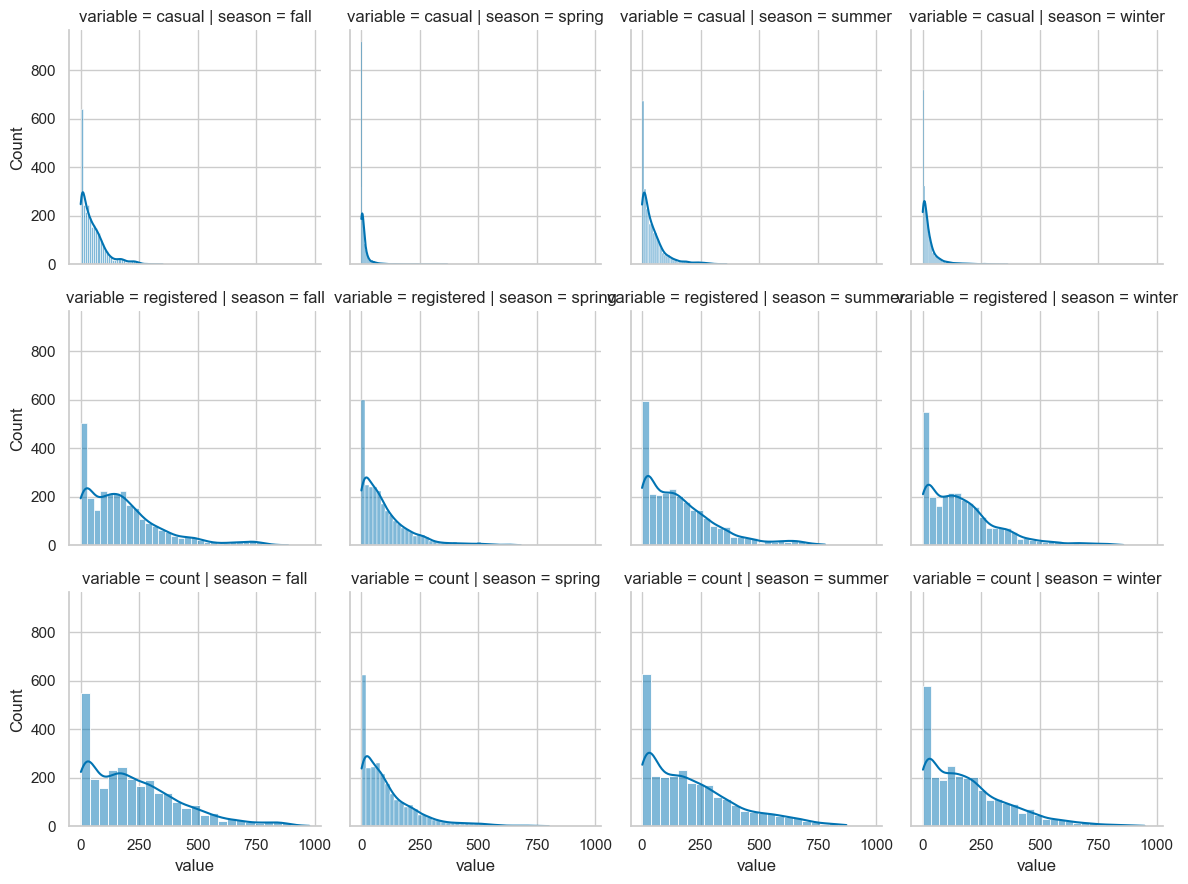

In [43]:
bikes_long = bikes.melt(id_vars=['season'],value_vars=["casual","registered", "count"])
g = sns.FacetGrid(bikes_long, col='season', row='variable').map(sns.histplot, 'value', kde=True)

## Advanced plots: Violin plot

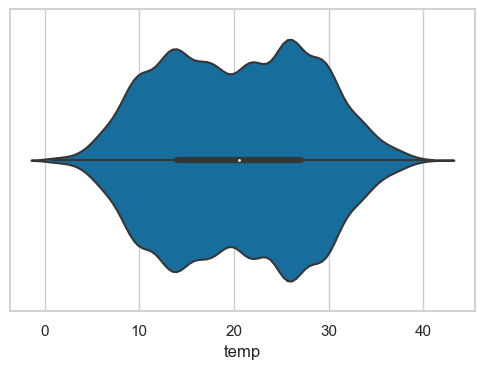

In [44]:
sns.violinplot(data=bikes, x='temp');

## Advanced plots: Violin plot

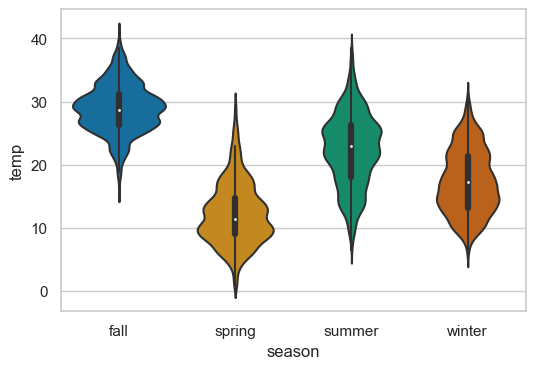

In [45]:
sns.violinplot(data=bikes, y='temp', x='season');

## Advanced plots: Heatmap

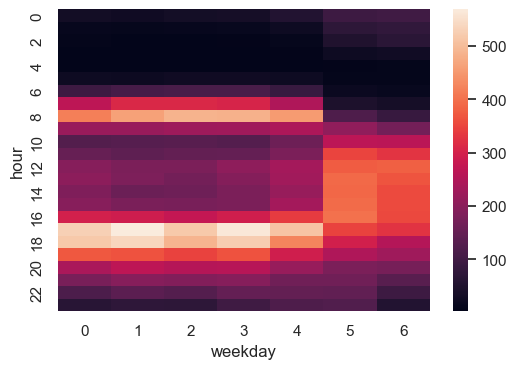

In [46]:
sns.heatmap(bikes_3D);

## Advanced plots: Heatmap for correlation matrix

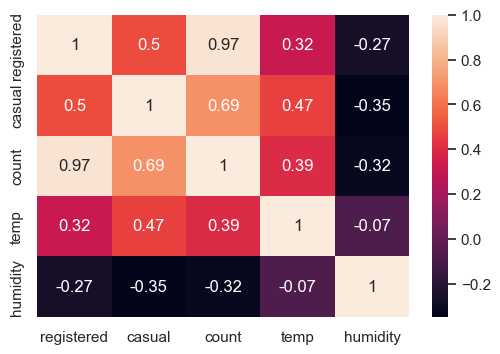

In [47]:
sns.heatmap(bikes[['registered','casual','count','temp','humidity']].corr(), annot=True);

## Advanced plots: Lines instead of Scatters

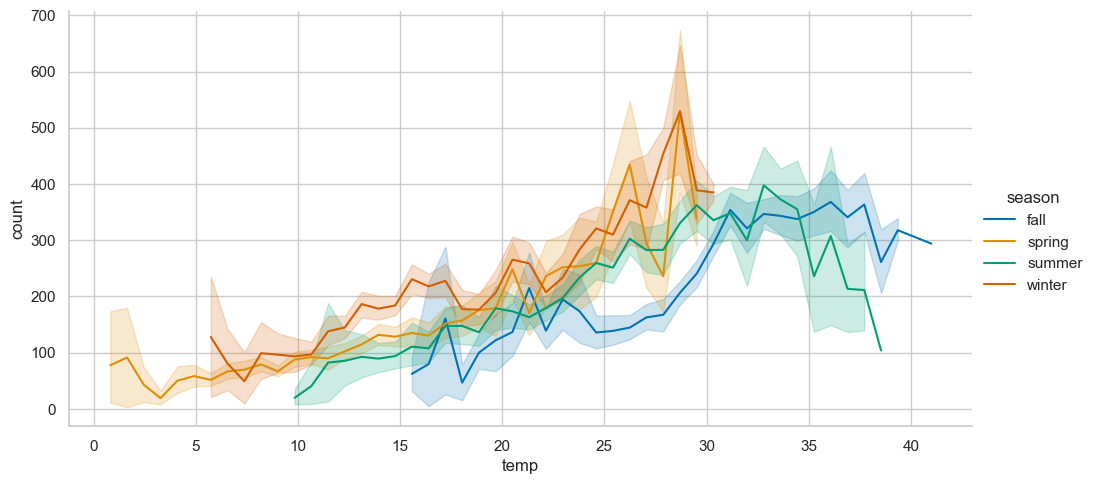

In [48]:
sns.relplot(data = bikes.dropna(), x='temp', y='count', kind="line", hue="season", aspect=2);

## Advanced plots: Linear regression

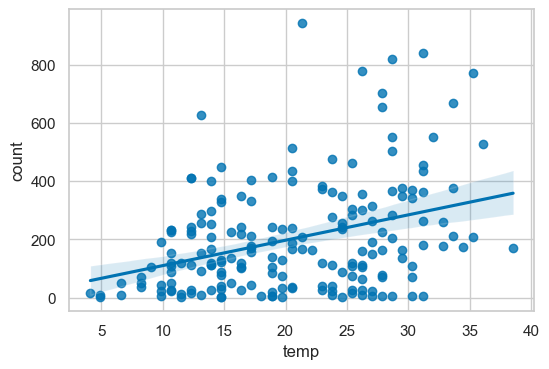

In [49]:
bikes_sample = bikes.sample(300)
sns.regplot(data=bikes_sample, x='temp', y='count');

## Advanced plots: Linear regression

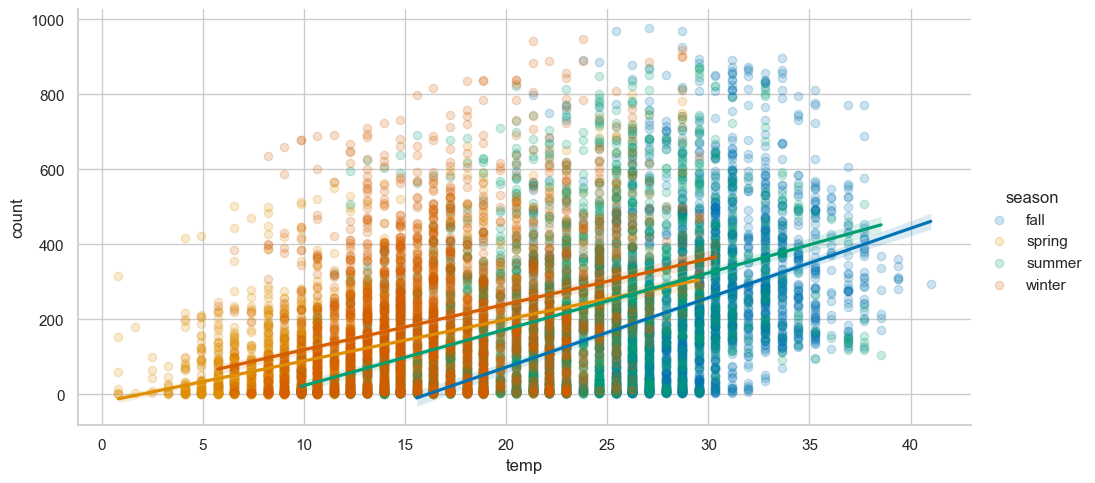

In [50]:
sns.lmplot(data=bikes, x='temp', y='count', hue="season",aspect=2,  scatter_kws={'alpha':0.2});

# Thank you